In [1]:
# StreetEasy is New York City’s leading real estate marketplace. You will be working with a
# dataset that contains a sample of 3,540 rentals listings in Manhattan.
# https://www.kaggle.com/zohaib30/streeteasy-dataset?select=manhattan.csv

In [57]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Step 1: Load your data, including testing/training split from Project 1.

In [3]:
manhattan = pd.read_csv('manhattan.csv')
manhattan.shape
#below we can see our dataset has 3539 rows and 18 columns 

(3539, 18)

In [4]:
## I had big issues with my test set, and after trying different methods. 
## I found the solution was dropping these 2 neigborhoods from the beginning since they were outliers

In [5]:
# Get indexes where name column has value john
indexNames = manhattan[manhattan['neighborhood'] == 'Manhattanville'].index
 
# Delete these row indexes from dataFrame
manhattan.drop(indexNames , inplace=True)

In [6]:
# Get indexes where name column has value john
indexNames = manhattan[manhattan['neighborhood'] == 'West Harlem'].index
 
# Delete these row indexes from dataFrame
manhattan.drop(indexNames , inplace=True)

In [7]:
y = manhattan["rent"]
print(y.head()) # y variable

0     2550
1    11500
2     4500
3     4795
4    17500
Name: rent, dtype: int64


In [8]:
X = manhattan.drop(["rent"], axis=1)
print(X.head()) # X variable

   rental_id  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545       0.0          1        480              9    2.0   
1       2472       2.0          2       2000              4    1.0   
2       2919       1.0          1        916              2   51.0   
3       2790       1.0          1        975              3    8.0   
4       3946       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0             1               1          0      

In [9]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

In [10]:
X_train.shape #60% of the data

(2369, 17)

In [11]:
X_test.shape #40% of the data

(1167, 17)

### Step 2: (If not already done in Project 1) Prepare your data

## Training Set

In [12]:
X_train_cleaned = X_train.copy() # copy of train dataset

In [13]:
X_train_cleaned.isnull().sum() # not missing values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [14]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_train_cleaned = X_train_cleaned.drop(["borough"], axis=1)
X_train_cleaned.shape

(2369, 16)

In [15]:
X_train_cleaned["neighborhood"].unique()

array(['Flatiron', 'Midtown East', 'Upper East Side', 'Midtown West',
       'Financial District', 'Battery Park City', 'Upper West Side',
       'Midtown South', 'Central Harlem', 'Soho', 'Chelsea', 'Midtown',
       'East Village', 'Gramercy Park', 'East Harlem',
       'Washington Heights', 'Nolita', 'Chinatown', 'Greenwich Village',
       'Tribeca', 'Inwood', 'West Village', 'Morningside Heights',
       'Little Italy', 'Central Park South', 'Lower East Side',
       'Stuyvesant Town/PCV', 'Roosevelt Island', 'Hamilton Heights',
       'Long Island City'], dtype=object)

In [16]:
# onehot encoding
#from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
#from sklearn.preprocessing import OneHotEncoder

#X_train_cat = X_train_cleaned['neighborhood'].values.reshape(-1,1)

#cat_encoder = OneHotEncoder(sparse=False)
#X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)
#X_train_cat_1hot

X_train_cleaned = pd.get_dummies(data=X_train_cleaned, drop_first=True)
X_train_cleaned.head()

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,neighborhood_Morningside Heights,neighborhood_Nolita,neighborhood_Roosevelt Island,neighborhood_Soho,neighborhood_Stuyvesant Town/PCV,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village
1262,10708,1.0,1,855,1,26.0,8,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1490,8753,4.0,2,1600,4,9.0,33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518,10321,1.0,1,770,8,7.0,55,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1327,1528,1.0,1,768,2,43.0,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
766,3696,1.0,1,854,5,27.0,30,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Test Set

In [17]:
X_test_cleaned = X_test.copy()

In [18]:
X_test_cleaned.isnull().sum() # not missisng values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [19]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_test_cleaned = X_test_cleaned.drop(["borough"], axis=1)
X_test_cleaned.shape

(1167, 16)

In [20]:
X_test_cleaned["neighborhood"].unique()

array(['Upper East Side', 'Midtown', 'Financial District', 'Chinatown',
       'Soho', 'Upper West Side', 'Midtown East', 'Central Harlem',
       'Flatiron', 'Gramercy Park', 'Midtown West', 'Chelsea',
       'West Village', 'Greenwich Village', 'Lower East Side',
       'East Village', 'Midtown South', 'Battery Park City',
       'East Harlem', 'Central Park South', 'Little Italy', 'Tribeca',
       'Morningside Heights', 'Inwood', 'Washington Heights',
       'Roosevelt Island', 'Hamilton Heights', 'Long Island City',
       'Stuyvesant Town/PCV', 'Nolita'], dtype=object)

In [21]:
# onehot encoding
#from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
#from sklearn.preprocessing import OneHotEncoder

#X_test_cat = X_test_cleaned['neighborhood'].values.reshape(-1,1)

#cat_encoder = OneHotEncoder(sparse=False)
#X_test_cat_1hot = cat_encoder.fit_transform(X_test_cat)
#X_test_cat_1hot

X_test_cleaned = pd.get_dummies(data=X_test_cleaned, drop_first=True)
X_test_cleaned.head()

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,neighborhood_Morningside Heights,neighborhood_Nolita,neighborhood_Roosevelt Island,neighborhood_Soho,neighborhood_Stuyvesant Town/PCV,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village
3463,7306,0.0,1,450,8,6.0,18,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3502,7662,1.0,1,1050,2,39.0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,3761,0.0,1,525,2,10.0,90,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2365,9328,0.0,0,986,3,3.0,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2067,5532,0.0,1,473,4,6.0,47,1,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Step 3: Examine your target attribute. Based on the data exploration you did in Project 1, confirm and examine the attribute you are going to predict.

In [22]:
# Examine and plot the distribution of the target attribute in your training set 
# (e.g., is it Gaussian, uniform, logarithmic). This will help you interpret the performance of 
# different algorithms on your data.

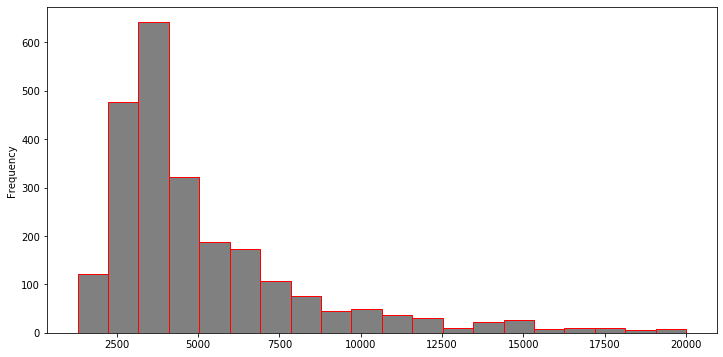

In [23]:
y_train.plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='red')

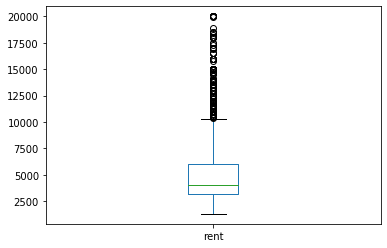

In [24]:
y_train.plot.box()

In [25]:
y_train.describe()

count     2369.000000
mean      5101.468552
std       3111.489430
min       1300.000000
25%       3150.000000
50%       4000.000000
75%       6000.000000
max      20000.000000
Name: rent, dtype: float64

### Step 4: Selected two of the following supervised learning algorithms, ideally one from the first half of the list and one from the second half of the list 

In [26]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train_cleaned, y_train)

In [27]:
print("Test set R^2: {:.2f}".format(tree.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, tree.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, tree.predict(X_test_cleaned))))

Test set R^2: 0.63
Test set RMSE: 3933651.68
Test set MAE: 1081.07


In [28]:
#lasso regresssion
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_cleaned, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_cleaned, y_train)))
print("Test set R^2: {:.2f}".format(lasso.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, lasso.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, lasso.predict(X_test_cleaned))))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.82
Test set R^2: 0.81
Test set RMSE: 1997387.86
Test set MAE: 892.62
Number of features used: 36


### Step 5: For each of your selected models

## Decision Tree Regression

### Grid Search for decision tree regression

In [29]:
# references: https://www.dezyre.com/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [30]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

In [31]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [32]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train_cleaned, y_train)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Criterion: gini
Best max_depth: 4
Best Number Of Components: 6

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4).fit(X_train_cleaned, y_train)

print("Test set R^2: {:.2f}".format(tree.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, tree.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, tree.predict(X_test_cleaned))))

Test set R^2: 0.77
Test set RMSE: 2478468.80
Test set MAE: 1017.00


In [38]:
tree = DecisionTreeRegressor(max_depth=3).fit(X_train_cleaned, y_train)

print("Test set R^2: {:.2f}".format(tree.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, tree.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, tree.predict(X_test_cleaned))))

Test set R^2: 0.75
Test set RMSE: 2635233.93
Test set MAE: 1042.24


## Lasso Regression 

### Grid Search for lasso regression

In [58]:
# REFERENCES: https://medium.com/analytics-vidhya/hyperparameters-80cb4f442e5


alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])

model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X_train_cleaned, y_train)

print("Best alpha ",grid.best_estimator_.alpha)
print("Best Score R2: {:.2f}".format(grid.best_score_))

Best alpha  1.0
Best Score R2: 0.81


C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1484642418.508277, tolerance: 1573369.8423734012
  positive)
C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kathi\

In [54]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso1 = Lasso(alpha=1.0, max_iter=1000000).fit(X_train_cleaned, y_train)
print("Training set score: {:.2f}".format(lasso1.score(X_train_cleaned, y_train)))
print("Test set R^2: {:.2f}".format(lasso1.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, lasso1.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, lasso1.predict(X_test_cleaned))))
print("Number of features used:", np.sum(lasso1.coef_ != 0))

Training set score: 0.82
Test set R^2: 0.81
Test set RMSE: 1997387.86
Test set MAE: 892.62
Number of features used: 36


In [55]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso05 = Lasso(alpha=0.5, max_iter=10000).fit(X_train_cleaned, y_train)
print("Training set score: {:.2f}".format(lasso05.score(X_train_cleaned, y_train)))
print("Test set R^2: {:.2f}".format(lasso05.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, lasso05.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, lasso05.predict(X_test_cleaned))))
print("Number of features used:", np.sum(lasso05.coef_ != 0))

Training set score: 0.82
Test set R^2: 0.81
Test set RMSE: 1996127.49
Test set MAE: 892.85
Number of features used: 39
